In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import mglearn
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
# FONT 깨질때 폰트깨질때
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [3]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

C:\Users\minta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (14,15,2279,2757,3282) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','TG_1','FatPercentage _1','BMI_1','PSQI_TOTAL_1','TG_2','FatPercentage_2','BMI_2','PSQI_TOTAL_2']]

psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','Insulin _1','FatPercentage _1','TG_1','BMI_1','AST_1','BUN_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1',
              'Insulin _2','FatPercentage_2','TG_2','BMI_2','AST_2','BUN_2','PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]

psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','HDL_1','DBP_1','Waist_1','SBP_1','BMI_1','Fat_1_x','PSQI_TOTAL_1','TG_1',
           'HDL_2','DBP_2','Waist_2','SBP_2','BMI_2','Fat_2_x','PSQI_TOTAL_2','TG_2']]

In [4]:
psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','Insulin _1','FatPercentage _1','TG_1','BMI_1','AST_1','BUN_1','HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','LDL_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1',
              'Insulin _2','FatPercentage_2','TG_2','BMI_2','AST_2','BUN_2','HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','LDL_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]

In [5]:
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,S0001,SMI,2,M,60,7.7,15.0,81,21.110190,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,S0002,SMI,2,M,61,5.4,29.5,106,27.782064,29.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
2,S0003,SMI,2,F,52,5.1,39.1,231,24.944742,16.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,S0004,SMI,2,F,41,4.2,29.1,94,22.620489,16.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,S0005,SMI,2,F,41,3.2,24.6,70,20.524157,26.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,11.3,34.4,51,34.803410,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,10.6,43.8,104,30.903615,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,12.2,35.8,128,28.676533,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,10.4,26.8,163,24.549738,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,S0001,SMI,2,M,60,7.7,15.0,81,21.110190,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,S0002,SMI,2,M,61,5.4,29.5,106,27.782064,29.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
2,S0003,SMI,2,F,52,5.1,39.1,231,24.944742,16.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,S0004,SMI,2,F,41,4.2,29.1,94,22.620489,16.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,S0005,SMI,2,F,41,3.2,24.6,70,20.524157,26.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,11.3,34.4,51,34.803410,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,10.6,43.8,104,30.903615,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,12.2,35.8,128,28.676533,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,10.4,26.8,163,24.549738,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df.isnull().sum()
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [8]:
#<150 (정상) : 0 -> 중간 값인 80으로 조정
#한단계씩 상향 조정
#150~199 (약간 높음 - 체중감량과 운동요법) : 1 -> 80~150 (정상)
#200~499 (높음 - 생활요법과 함께 약물치료 고려) : 2 -> 150~199 (약간 높음)
#>500 (아주 높음 - 즉시 약물치료) : 3 한명도 해당 X -> 200~ (높음~아주높음)

psqi_df["TG_1"] = psqi_df["TG_1"].apply(lambda x: 0. if x<80 else 1. if 80<=x<150 else 2. if 150<=x<200 else 3.)
psqi_df["TG_2"] = psqi_df["TG_2"].apply(lambda x: 0. if x<80 else 1. if 80<=x<150 else 2. if 150<=x<200 else 3.)
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [27]:
psqi_df

,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,BUN_1,HDL_1,DBP_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,1.0,35,5.57,23.80,1.0,24.097789,25.0,15.5,57,77.0,...,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,46,7.35,20.00,1.0,23.472213,31.0,12.5,68,73.0,...,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
2,1.0,32,9.26,24.00,0.0,23.744827,30.0,16.0,46,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,33,3.52,22.00,0.0,20.616175,25.0,13.5,96,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,28,2.86,22.30,0.0,18.437500,21.0,9.1,62,75.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.0,63,4.2,40.30,0.0,26.259585,26.0,12.0,55,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
172,1.0,57,8.8,30.44,0.0,28.630719,91.0,15.0,51,81.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
173,0.0,35,6.3,31.00,1.0,21.641274,18.0,11.8,58,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,0.0,61,4.8,27.30,0.0,20.421366,18.0,16.2,58,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [28]:
psqi_df['TG_1'].value_counts()

0.0    80
1.0    69
2.0    14
3.0    13
Name: TG_1, dtype: int64

In [29]:
psqi_df['TG_2'].value_counts()

0.0    82
1.0    71
3.0    13
2.0    10
Name: TG_2, dtype: int64

#x 배열 생성 (x=psqi)
X1=psqi_df[['PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1',
                           'PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1','PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1',
                           'PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values
X2=psqi_df[['PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
                           'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2','PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2',
                           'PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values

#y 배열 생성 (y=tg)
Y1 = psqi_df['TG_1'].tolist()
Y2 = psqi_df['TG_2'].tolist()
Y=Y1+Y2

#x 배열 생성 (x=임의)
X1=psqi_df[['SEX','AGE','Insulin _1','FatPercentage _1','BMI_1','AST_1','BUN_1','PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1',
            'PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1','PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1',
            'PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values
X2=psqi_df[['SEX','AGE','Insulin _2','FatPercentage_2','BMI_2','AST_2','BUN_2','PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
            'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2','PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2',
            'PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values

#y 배열 생성 (y=tg)
Y1 = psqi_df['TG_1'].tolist()
Y2 = psqi_df['TG_2'].tolist()
Y=Y1+Y2

#x 배열 생성 (x=선별)
X1=psqi_df[['AGE','HDL_1','DBP_1','Waist_1','SBP_1','BMI_1','Fat_1_x','PSQI_TOTAL_1']].values
X2=psqi_df[['AGE','HDL_2','DBP_2','Waist_2','SBP_2','BMI_2','Fat_2_x','PSQI_TOTAL_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=tg)
Y1 = psqi_df['TG_1'].tolist()
Y2 = psqi_df['TG_2'].tolist()
Y=Y1+Y2

#x 배열 생성 (x=임의+선별)
X1=psqi_df[['HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','Insulin _1','FatPercentage _1','BMI_1','AST_1','BUN_1','LDL_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','Insulin _2','FatPercentage_2','BMI_2','AST_2','BUN_2','LDL_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=tg)
Y1 = psqi_df['TG_1'].tolist()
Y2 = psqi_df['TG_2'].tolist()
Y=Y1+Y2

In [33]:
#x 배열 생성 (x=임의+선별)
X1=psqi_df[['HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','Insulin _1','FatPercentage _1','BMI_1','AST_1','BUN_1','LDL_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','Insulin _2','FatPercentage_2','BMI_2','AST_2','BUN_2','LDL_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=tg, sex, age)
Y1= psqi_df[['TG_1']].values
Y2= psqi_df[['TG_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

#x df 생성 (x=임의+선별) ~수정작업중~
X1=psqi_df[['HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','Insulin _1','FatPercentage _1','BMI_1','AST_1','BUN_1','LDL_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']]
#예외처리
X1=X1.rename({ 'Fat_1_x' : 'Fat_x_1'}, axis=1)
X1=X1.rename({ 'FatPercentage _1' : 'FatPercentage_1'}, axis=1)
X1=X1.rename({ 'Insulin _1' : 'Insulin_1'}, axis=1)
for i in X1.columns:
    X1=X1.rename({ i : i[:-2]}, axis=1)

X2=psqi_df[['HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','Insulin _2','FatPercentage_2','BMI_2','AST_2','BUN_2','LDL_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]
#예외처리
X2=X2.rename({ 'Fat_2_x' : 'Fat_x_2'}, axis=1)
X2=X2.rename({ 'Insulin _2' : 'Insulin_2'}, axis=1)
for i in X2.columns:
    X2=X2.rename({ i : i[:-2]}, axis=1)

X=pd.concat((X1, X2), axis=0)


#y df 생성 (y=tg, sex, age)
Y1= psqi_df[['TG_1', 'SEX', 'AGE']]
Y2= psqi_df[['TG_2', 'SEX', 'AGE']]

Y1=Y1.rename({'TG_1' : 'TG'}, axis=1)
Y2=Y2.rename({'TG_2' : 'TG'}, axis=1)
Y=pd.concat((Y1, Y2), axis=0)

In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
oh_encoder = OneHotEncoder()
oh_encoder.fit(Y)
oh_labels = oh_encoder.transform(Y)
Y = oh_labels.toarray()
print(Y)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [15]:
len(X), len(Y)

(352, 352)

In [16]:
X.shape, Y.shape

((352, 37), (352, 1))

# 정규화

In [17]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [37]:
np.random.seed(0)
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [38]:
X.shape, Y.shape

((352, 37), (352, 4))

# MLP

In [42]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=37))
#model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

#fit model
history=model.fit(x_train, y_train, epochs=200, batch_size=4)

Epoch 1/200
71/71 [==============================] - 0s 1ms/step - loss: 2.8202 - accuracy: 0.3879
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 1.8267 - accuracy: 0.5125
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 1.5585 - accuracy: 0.4947
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 1.5170 - accuracy: 0.4947
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 1.4784 - accuracy: 0.4626
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 1.3103 - accuracy: 0.5089
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 1.2766 - accuracy: 0.5125
Epoch 8/200
71/71 [==============================] - 0s 2ms/step - loss: 1.2244 - accuracy: 0.5160
Epoch 9/200
71/71 [==============================] - 0s 2ms/step - loss: 1.2633 - accuracy: 0.5445
Epoch 10/200
71/71 [==============================] - 0s 1ms/step - loss: 1.2055 - accuracy: 0.4982
Epoch 11/

In [43]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

3/3 [==============================] - 0s 1ms/step - loss: 2.8134 - accuracy: 0.5070
accuracy: 50.70%


y_test

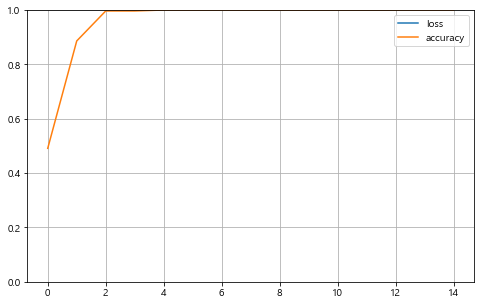

In [48]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## 예측 정확도
- <epoch 200, batch_size=4, optimizer=rmsprop> <br>
train: 94.31%<br>
test: 50.7% <br>